# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn random forest.

First, we will fit the penguins regression dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_names = ["Flipper Length (mm)"]
target_name = "Body Mass (g)"
data, target = penguins[feature_names], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the statistical performance on the testing set in terms of mean
absolute error.

In [18]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate

In [4]:
rf_model = RandomForestRegressor(n_estimators=3,criterion='mae')

In [7]:
cv_result = cross_val_score(rf_model, data_train, target_train, cv=10)

In [8]:
cv_result.mean(), cv_result.std()

(0.7168447472112331, 0.05184267713529259)

In [21]:
cv_result = cross_validate(rf_model, data_train, target_train, cv=10, return_estimator=True)

In [24]:
cv_result['test_score'].mean(), cv_result['test_score'].std()

(0.7158254498354949, 0.07199968955981964)

In [31]:
[est.score(data_test, target_test) for est in cv_result['estimator']]

[0.658862301006659,
 0.6730012381566108,
 0.645430811976453,
 0.6486462422117836,
 0.6060543231498605,
 0.6605351802166013,
 0.6880691813400504,
 0.636175171649291,
 0.6914664026840923,
 0.6516598308484715]

In [33]:
rf_model.fit(data_train, target_train)

RandomForestRegressor(criterion='mae', n_estimators=3)

In [34]:
rf_model.score(data_test, target_test)

0.6792459632457422

In [35]:
rf_model.estimators_

[DecisionTreeRegressor(criterion='mae', max_features='auto',
                       random_state=213113977),
 DecisionTreeRegressor(criterion='mae', max_features='auto',
                       random_state=451500070),
 DecisionTreeRegressor(criterion='mae', max_features='auto',
                       random_state=1008771907)]

The next steps of this exercise are to:

- create a new dataset containing the penguins with a flipper length
  between 170 mm and 230 mm;
- plot the training data using a scatter plot;
- plot the decision of each individual tree by predicting on the newly
  created dataset;
- plot the decision of the random forest using this newly created dataset.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The trees contained in the forest that you created can be accessed
with the attribute <tt class="docutils literal">estimators_</tt>.</p>
</div>

In [58]:
import seaborn as sns
import numpy as np

In [59]:
data_test = pd.DataFrame(np.linspace(170, 235, num=300),
                           columns=data.columns)

In [60]:
pred_avg = rf_model.predict(data_test)

In [61]:
pred_est = [model.predict(data_test) for model in rf_model.estimators_]

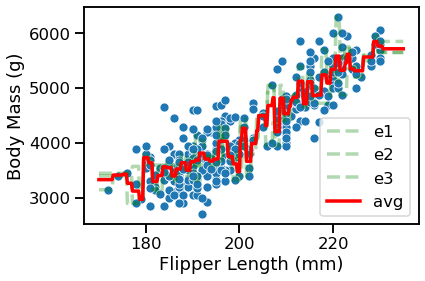

In [63]:
ax = sns.scatterplot(data=data_sub, x=feature_names[0], y=target_name)

ax.plot(data_test,pred_est[0], linestyle='--', alpha=0.3, color='green', label='e1')
ax.plot(data_test,pred_est[1], linestyle='--', alpha=0.3, color='green', label='e2')
ax.plot(data_test,pred_est[2], linestyle='--', alpha=0.3, color='green', label='e3')
ax.plot(data_test,pred_avg, linestyle='-', color='red', label='avg')
ax.legend()